<a href="https://colab.research.google.com/github/rahiakela/math-for-programmers/blob/main/2-drawing-with-2d-vectors/2_plane_vector_arithmetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plane vector arithmetic

A two-dimensional (2D) object is flat like an image on a piece of paper or a computer screen. It has only the dimensions of height and width. A
three-dimensional (3D) object in our physical world, however, has not only height and width but also depth.

Even though our everyday experience takes place in three dimensions, it's useful to think of some data as higher dimensional. In physics, it’s common to consider time as the fourth dimension. While an object exists at a location in 3D space, an event occurs at a 3D location and at a specified moment. In data science problems, it’s common for data sets to have far more dimensions.

Grappling with these problems in graphics, physics, and data analysis requires a framework for dealing with data in higher dimensions. This framework is vector mathematics.

Vectors are objects that live in multi-dimensional spaces. These have their own
notions of arithmetic (adding, multiplying, and so on).



## Setup

In [3]:
!wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/2-drawing-with-2d-vectors/vector_drawing.py

--2020-12-25 14:21:55--  https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/2-drawing-with-2d-vectors/vector_drawing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4645 (4.5K) [text/plain]
Saving to: ‘vector_drawing.py’

vector_drawing.py   100%[===================>]   4.54K  --.-KB/s    in 0s      

2020-12-25 14:21:55 (80.9 MB/s) - ‘vector_drawing.py’ saved [4645/4645]



In [4]:
from vector_drawing import * 

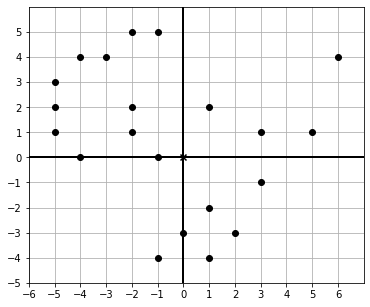

In [5]:
# we can draw the points outlining the dinosaur
dino_vectors = [
  (6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
  (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
  (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)          
]

draw(Points(*dino_vectors))

## Introduction

Like numbers, vectors have their own kind of arithmetic; we can combine vectors with operations to make new vectors. The difference with vectors is that we can visualize the results. Operations from vector arithmetic all accomplish useful geometric transformations, not just algebraic ones. We’ll start with the most basic operation: **vector addition**.

Vector addition is simple to calculate: given two input vectors, you add their
x-coordinates to get the resulting x-coordinate and then you add their y-coordinates to get the resulting y-coordinate. Creating a new vector with these summed coordinates gives you the vector sum of the original vectors. For instance, `(4, 3) + (–1, 1) = (3, 4)` because `4 + (–1) = 3` and `3 + 1 = 4`.

Vector addition is a one-liner to implement in Python:



In [1]:
def add(v1, v2):
  return (v1[0] + v2[0], v1[1] + v2[1])

In [2]:
v1 = [4, 3]
v2 = [-1, 1]
add(v1, v2)

(3, 4)

Because we can interpret vectors as arrows or as points in the plane, we can visualize the result of the addition in both ways. As a point in the plane, you can reach `(–1, 1)` by starting at the origin, which is `(0, 0)`, and move one unit to the left and one unit up. You reach the vector sum of `(4, 3) + (–1, 1)` by starting instead at `(4, 3)` and moving one unit to the left and one unit up. This is the same as saying you traverse one arrow and then traverse the second arrow, in other words, you have moved forward.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/vector-sum.png?raw=1' width='800'/>

The rule for vector addition of arrows is sometimes called tip-to-tail addition. That’s because if you move the tail of the second arrow to the tip of the first (without changing its length or direction!), then the sum is the arrow from the start of the first to the end of the second.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/tip-to-tail.png?raw=1' width='800'/>

When we talk about arrows, we really mean “a specific distance in a specific direction.” If you walk one distance in one direction andanother distance in  another direction, the vector sum tells you the overall distance and
direction you traveled.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/vector-sum-distance.png?raw=1' width='800'/>

**Adding a vector has the effect of moving or translating an existing point or collection of points.**

If we add the vector `(–1.5, –2.5)` to every vector of dino_vectors, we get a new list of vectors, each of which is `1.5` units left and `2.5` units down from one of the original vectors.



In [6]:
dino_vectors2 = [add((-1.5, -2.5), v) for v in dino_vectors]

The result is the same dinosaur shape shifted down and to the left by the vector `(–1.5, –2.5)`.

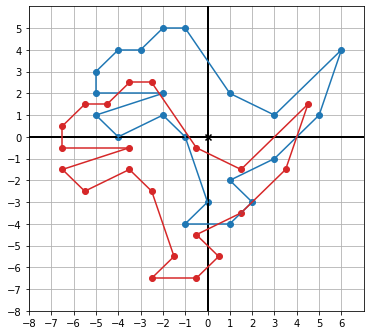

In [8]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

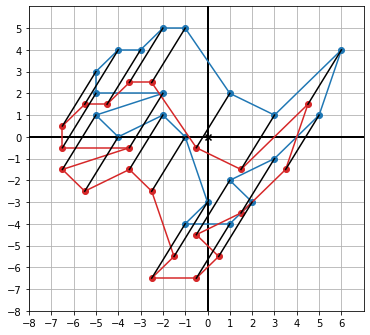

In [9]:
arrows = [Segment(tip, tail, color=black) for tip, tail in zip(dino_vectors2, dino_vectors)]

draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
    *arrows
)

A translation like this is useful if, for instance, we want to make the dinosaur a moving character in a 2D computer game. Depending on the button pressed by the user, the dinosaur could translate in the corresponding direction
on the screen.

## Vector components and lengths

With a ruler, we can measure one dimension such as the length of an object. To measure in two dimensions, we need two rulers. These rulers are called axes (the singular is axis), and we lay them out in the plane perpendicular to one another, intersecting at the origin. Drawn with axes, our dinosaur has the notions of up and down as well as left and right. The horizontal axis is called the x-axis and the vertical one is called the y-axis.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/dinosaur-drawn.png?raw=1' width='800'/>

With axes to orient us, we can say things like, “Four of the points are above and to the right of the origin.” But we’ll want to get more quantitative than that. A ruler has tick marks that show how many units along it we’ve measured. Likewise, in our 2D drawing, we can add grid lines perpendicular to the axes that show where points lie relative to them. By convention, we place the origin at tick 0 on both the x- and y-axes.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/grid-lines.png?raw=1' width='800'/>

In the context of this grid, we can measure vectors in the plane. For example, the tip of the dinosaur’s tail lines up with positive 6 on the x-axis and positive 4 on the y-axis. We could think of these distances as centimeters, inches, pixels, or any other unit of length, but usually we leave the units unspecified unless we have a particular application in mind.

The numbers 6 and 4 are called the x- and y-coordinates of the point, and this is enough to tell us exactly what point we’re talking about. We typically write coordinates as an ordered pair (or tuple) with the x-coordinate first and the y-coordinate second, for example, (6, 4).

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/three-mental.png?raw=1' width='800'/>



## 2D drawing in Python

When you produce an image on a screen, you’re working in a 2D space. The pixels on the screen are the available points in that plane. These are labeled by whole number coordinates rather than real number coordinates, and you can’t illuminate the space between pixels. That said, most graphics libraries let you work with floating-point coordinates and automatically handle translating graphics to pixels on the screen.

We have plenty of language choices and libraries to specify graphics and to get
them on the screen: OpenGL, CSS, SVG, and so on. Python has libraries like Pillow and Turtle that are well equipped for creating drawings with vector data.

<img src='https://github.com/rahiakela/img-repo/blob/master/math-for-programmers/python-classes.png?raw=1' width='800'/>

The most important function I’ve included, called draw, takes inputs representing geometric objects and keyword arguments specifying how you want your drawing to look.

In [ ]:
!wget https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/2-drawing-with-2d-vectors/vector_drawing.py

--2020-12-24 13:21:25--  https://raw.githubusercontent.com/rahiakela/math-for-programmers/main/2-drawing-with-2d-vectors/vector_drawing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4645 (4.5K) [text/plain]
Saving to: ‘vector_drawing.py’

vector_drawing.py   100%[===================>]   4.54K  --.-KB/s    in 0s      

2020-12-24 13:21:25 (63.7 MB/s) - ‘vector_drawing.py’ saved [4645/4645]



In [ ]:
from vector_drawing import * 

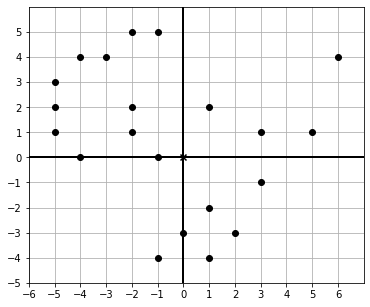

In [ ]:
# we can draw the points outlining the dinosaur
dino_vectors = [
  (6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
  (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
  (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)          
]

draw(Points(*dino_vectors))

As a next step in our drawing process, we can connect some dots. A first segment
might connect the point (6, 4) with the point (3, 1) on the dinosaur’s tail.

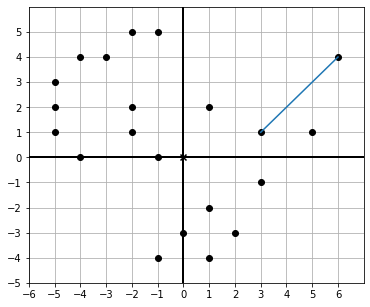

In [ ]:
draw(Points(*dino_vectors), Segment((6, 4), (3, 1)))

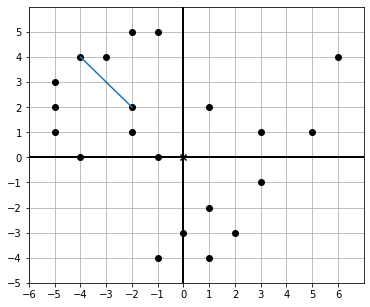

In [ ]:
draw(Points(*dino_vectors), Segment((-4, 4), (-2, 2)))

The Segment class is a useful abstraction because we don’t have to build every segment from the points that make up our geometric object (in this case, the dinosaur). Drawing 20 more segments, we get the complete outline of the dinosaur.

In [ ]:
dino_vectors[0] # get first tuple

(6, 4)

In [ ]:
dino_vectors[1]  # get second tuple

(3, 1)

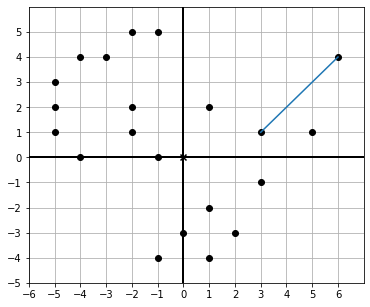

In [ ]:
# now draw line using tuple value
draw(Points(*dino_vectors), Segment(dino_vectors[0], dino_vectors[1]))

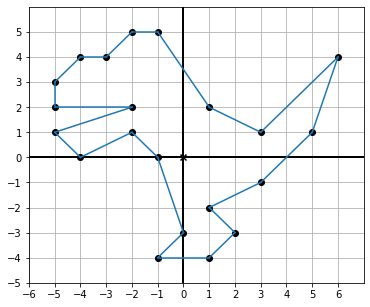

In [ ]:
# Draw the dinosaur with the dots connected by constructing a Polygon object with the dino_vectors as its vertices.
draw(Points(*dino_vectors), Polygon(*dino_vectors))

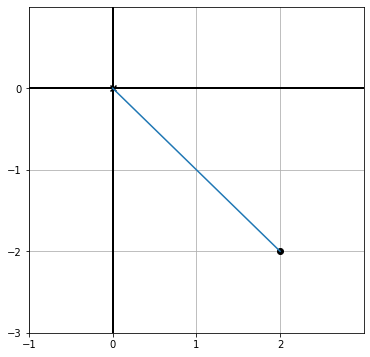

In [ ]:
# Draw the point in the plane and the arrow corresponding to the point (2, –2).
draw(Points((2, -2)), Segment((0, 0), (2, -2)))

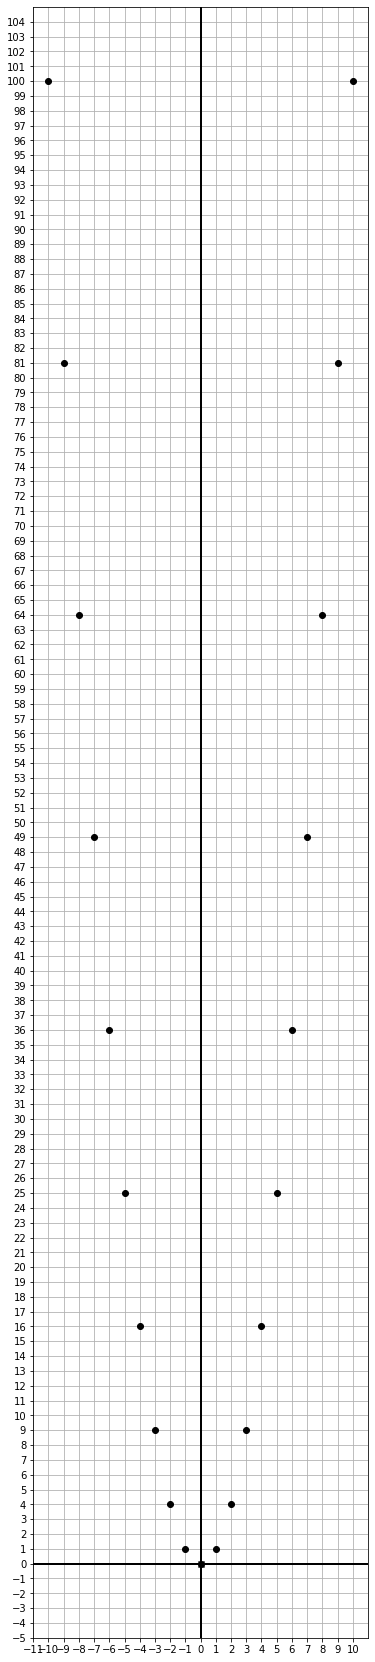

In [ ]:
# Draw the vectors (x,x**2) for x in the range from x = –10 to x = 11) as points (dots) using the draw function. What is the result?
squared_vec = []
for x in range(-10, 11):
  squared_vec.append((x, x ** 2))
squared_vec
draw(Points(*squared_vec))

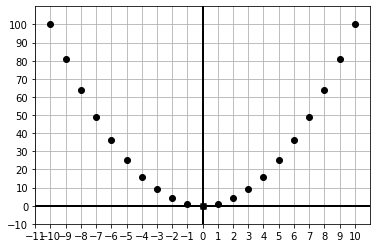

In [ ]:
draw(
    Points(*[(x, x ** 2) for x in range(-10, 11)]), 
    grid=(1, 10),
    nice_aspect_ratio=False  # don't require x scale to match y scale
)

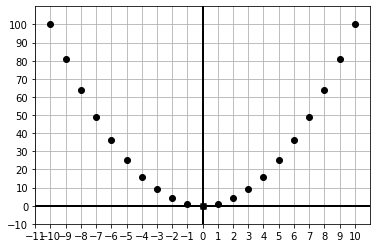

In [ ]:
squared_vec = []
for x in range(-10, 11):
  squared_vec.append((x, x ** 2))
squared_vec
draw(Points(*squared_vec), nice_aspect_ratio=False, grid=(1, 10))